In [1]:
import requests

url = 'https://api.clever.com/v1.1/sections'
headers = {'Authorization' : 'Bearer DEMO_TOKEN'}
params = {'limit': 500}

r = requests.get(url, params=params, headers=headers)
r

C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\requests\packages\urllib3\util\ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


<Response [200]>

In [2]:
from pprint import pprint
pprint(r.json())

{u'data': [{u'data': {u'course_name': u'Group Guidance',
                      u'course_number': u'101',
                      u'created': u'2014-02-26T21:15:37.927Z',
                      u'district': u'4fd43cc56d11340000000005',
                      u'grade': u'10',
                      u'id': u'530e5979049e75a9262d0af2',
                      u'last_modified': u'2014-12-29T15:49:36.680Z',
                      u'name': u'Group Guidance - 101 - B. Greene (Section 1)',
                      u'period': u'0',
                      u'school': u'530e595026403103360ff9fd',
                      u'sis_id': u'581',
                      u'students': [u'530e5960049e75a9262cff4f',
                                    u'530e5960049e75a9262cff95',
                                    u'530e5961049e75a9262cffe0',
                                    u'530e5961049e75a9262d0027',
                                    u'530e5961049e75a9262d008d',
                                    u'530e5963049e75a92

In [3]:
(r.json()['paging']) # used this to ensure I captured all the results

{u'count': 382, u'current': 1, u'total': 1}

In [4]:
# traversing the json and getting it into a dataframe
import pandas as pd

lvl1 = r.json()['data']
lvl2 = [i['data'] for i in lvl1]
lvl2

[{u'course_name': u'Group Guidance',
  u'course_number': u'101',
  u'created': u'2014-02-26T21:15:37.927Z',
  u'district': u'4fd43cc56d11340000000005',
  u'grade': u'10',
  u'id': u'530e5979049e75a9262d0af2',
  u'last_modified': u'2014-12-29T15:49:36.680Z',
  u'name': u'Group Guidance - 101 - B. Greene (Section 1)',
  u'period': u'0',
  u'school': u'530e595026403103360ff9fd',
  u'sis_id': u'581',
  u'students': [u'530e5960049e75a9262cff4f',
   u'530e5960049e75a9262cff95',
   u'530e5961049e75a9262cffe0',
   u'530e5961049e75a9262d0027',
   u'530e5961049e75a9262d008d',
   u'530e5963049e75a9262d0180',
   u'530e5964049e75a9262d0300',
   u'530e5964049e75a9262d0302',
   u'530e5964049e75a9262d0304',
   u'530e5965049e75a9262d039e',
   u'530e5965049e75a9262d03b6',
   u'530e5965049e75a9262d03e8',
   u'530e5966049e75a9262d040c',
   u'530e5966049e75a9262d04cc',
   u'530e5967049e75a9262d05c0',
   u'530e5968049e75a9262d062f'],
  u'subject': u'homeroom/advisory',
  u'teacher': u'530e5955d50c310f36112c

In [8]:
df = pd.DataFrame(lvl2)
print len(df)
df.head()

382


,course_name,course_number,created,district,grade,id,last_modified,name,period,school,sis_id,students,subject,teacher,teachers,term
0,Group Guidance,101,2014-02-26T21:15:37.927Z,4fd43cc56d11340000000005,10,530e5979049e75a9262d0af2,2014-12-29T15:49:36.680Z,Group Guidance - 101 - B. Greene (Section 1),0,530e595026403103360ff9fd,581,"[530e5960049e75a9262cff4f, 530e5960049e75a9262...",homeroom/advisory,530e5955d50c310f36112c11,[530e5955d50c310f36112c11],"{u'name': u'Y1', u'end_date': u'2013-06-01', u..."
1,Group Guidance,102,2014-02-26T21:15:37.934Z,4fd43cc56d11340000000005,10,530e5979049e75a9262d0af3,2014-12-29T15:49:36.684Z,Group Guidance - 102 - T. Vaux (Section 2),0,530e595026403103360ff9fd,582,"[530e5961049e75a9262d0010, 530e5961049e75a9262...",homeroom/advisory,530e5955d50c310f36112c12,[530e5955d50c310f36112c12],"{u'name': u'Y1', u'end_date': u'2013-06-01', u..."
2,Group Guidance,103,2014-02-26T21:15:37.938Z,4fd43cc56d11340000000005,10,530e5979049e75a9262d0af4,2014-12-29T15:49:36.686Z,Group Guidance - 103 - E. Britcher (Section 3),0,530e595026403103360ff9fd,583,"[530e5960049e75a9262cff39, 530e5960049e75a9262...",homeroom/advisory,530e5955d50c310f36112c13,[530e5955d50c310f36112c13],"{u'name': u'Y1', u'end_date': u'2013-06-01', u..."
3,Group Guidance,104,2014-02-26T21:15:37.942Z,4fd43cc56d11340000000005,10,530e5979049e75a9262d0af5,2014-12-29T15:49:36.689Z,Group Guidance - 104 - J. Isaacs (Section 4),0,530e595026403103360ff9fd,584,"[530e5960049e75a9262cff26, 530e5961049e75a9262...",homeroom/advisory,530e5955d50c310f36112c14,[530e5955d50c310f36112c14],"{u'name': u'Y1', u'end_date': u'2013-06-01', u..."
4,Group Guidance,105,2014-02-26T21:15:37.946Z,4fd43cc56d11340000000005,10,530e5979049e75a9262d0af6,2014-02-26T21:15:37.948Z,Group Guidance - 105 - J. Cummings (Section 5),0,530e595026403103360ff9fd,585,"[530e5962049e75a9262d00b5, 530e5962049e75a9262...",homeroom/advisory,530e5955d50c310f36112c16,[530e5955d50c310f36112c16],"{u'name': u'Y1', u'end_date': u'2013-06-01', u..."


In [9]:
# fix/summarize the students column and understand how many districts, schools are captured
df['class_size'] = df.students.apply(lambda x: len(x))
df.class_size

0     16
1     14
2     21
3     13
4     17
5     17
6     26
7     26
8     26
9     26
10    26
11    26
12    26
13    26
14    26
...
367    34
368    20
369    20
370    20
371    26
372    27
373    25
374    20
375    20
376    21
377    19
378    20
379     7
380     7
381     3
Name: class_size, Length: 382, dtype: int64

In [10]:
# understanding # of districts, schools etc in dataset
for i in df:
    try:
        print i + ': ' + str(len(df[i].value_counts()))
    except:
        continue

# there is only 1 district and 3 schools in here

course_name: 321
course_number: 69
created: 382
district: 1
grade: 13
id: 382
last_modified: 382
name: 382
period: 10
school: 3
sis_id: 382
subject: 10
teacher: 79
teachers: 80
class_size: 20


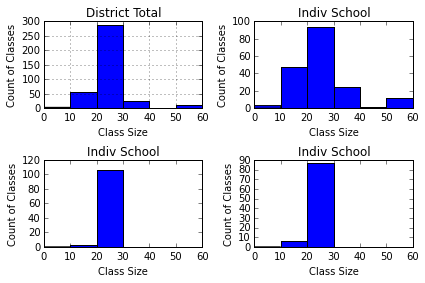

In [11]:
# understanding the distribution of class sizes within this district
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

bins = np.linspace(0,60,7)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax234 = [ax2, ax3, ax4]

plt.subplot(ax1)
df.class_size.hist(bins=bins)
ax1.set_title('District Total')
ax1.set_xlabel('Class Size')
ax1.set_ylabel('Count of Classes')

for ax, i in zip(ax234, df.school.value_counts().index):
    ax.hist(df.class_size[df.school == i].values, bins=bins)
    ax.set_xlabel('Class Size')
    ax.set_ylabel('Count of Classes')
    ax.set_title('Indiv School')

plt.tight_layout()

In [12]:
# In 'raw data' form
df.groupby('school').describe()

class_size
school                                    
530e595026403103360ff9fd count  181.000000
                         mean    24.441989
                         std      9.158069
                         min      3.000000
                         25%     19.000000
                         50%     25.000000
                         75%     25.000000
                         max     50.000000
530e595026403103360ff9fe count  108.000000
                         mean    20.537037
                         std      0.702810
                         min     16.000000
                         25%     20.000000
                         50%     21.000000
                         75%     21.000000
                         max     22.000000
530e595026403103360ff9ff count   93.000000
                         mean    25.139785
                         std      2.199760
                         min     19.000000
                         25%     26.000000
                         50%     26.000000
                         75%     26.000000
                         max     27.000000

In [14]:
# Checking if it's because of two K-8 schools feeding to a single 9-12... nope
print df.groupby(['school']).sum() # sum of class sizes
print df.groupby(['school']).course_number.count() # sum of classes
df.groupby(['school', 'grade']).class_size.max()

                          class_size
school                              
530e595026403103360ff9fd        4424
530e595026403103360ff9fe        2218
530e595026403103360ff9ff        2338
school
530e595026403103360ff9fd    181
530e595026403103360ff9fe    108
530e595026403103360ff9ff     93
Name: course_number, dtype: int64


school                    grade       
530e595026403103360ff9fd  10              50
                          11              50
                          12              50
                          9               50
530e595026403103360ff9fe  1               21
                          2               21
                          3               22
                          4               21
                          5               21
                          Kindergarten    21
530e595026403103360ff9ff  6               27
                          7               26
                          8               26
Name: class_size, dtype: int64

There is a large class-size problem in the district, driven by outliers in school '....d' (the high school).

All 3 schools have 20-25 class size on average, but the high school has a much wider variance in class size

(array([1, 2, 3]), <a list of 3 Text xticklabel objects>)

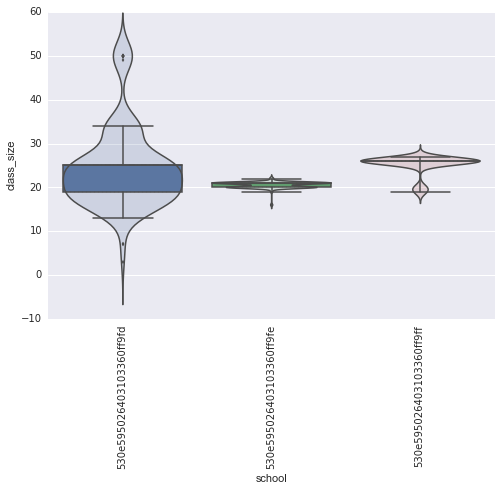

In [16]:
# bonus visualization
import seaborn as sns
sns.violinplot(df.class_size, groupby=df.school, names=df.school.unique().sort(), alpha=0.2)
plt.xticks(rotation='vertical')

sns.boxplot(df.class_size, groupby=df.school, names=df.school.unique().sort())
plt.xticks(rotation='vertical')

In [17]:
# Any conclusions to be drawn from looking at the large classes?
df[df.class_size > 45]

,course_name,course_number,created,district,grade,id,last_modified,name,period,school,sis_id,students,subject,teacher,teachers,term,class_size
74,AP English Literature and Composition,9,2014-02-26T21:15:38.242Z,4fd43cc56d11340000000005,12,530e597a049e75a9262d0b3c,2014-02-26T21:15:38.246Z,AP English Literature and Composition - 009 - ...,8,530e595026403103360ff9fd,655,"[530e5960049e75a9262cff54, 530e5960049e75a9262...",english/language arts,530e5955d50c310f36112be7,[530e5955d50c310f36112be7],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",50
97,French III,301,2014-02-26T21:15:38.345Z,4fd43cc56d11340000000005,11,530e597a049e75a9262d0b53,2014-02-26T21:15:38.348Z,French III - 301 - G. Gorczany (Section 1),2,530e595026403103360ff9fd,679,"[530e5960049e75a9262cff2f, 530e5960049e75a9262...",language,530e5955d50c310f36112bf9,[530e5955d50c310f36112bf9],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",50
98,French IV,401,2014-02-26T21:15:38.349Z,4fd43cc56d11340000000005,12,530e597a049e75a9262d0b54,2014-02-26T21:15:38.352Z,French IV - 401 - G. Gorczany (Section 1),1,530e595026403103360ff9fd,680,"[530e5960049e75a9262cff54, 530e5960049e75a9262...",language,530e5955d50c310f36112bf9,[530e5955d50c310f36112bf9],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",50
244,"Physical Education, Group 10A",201,2014-02-26T21:15:38.973Z,4fd43cc56d11340000000005,10,530e597a049e75a9262d0be6,2014-02-26T21:15:38.976Z,"Physical Education, Group 10A - 201 - P. McCar...",8,530e595026403103360ff9fd,826,"[530e5960049e75a9262cff1f, 530e5960049e75a9262...",PE and health,530e5955d50c310f36112c07,[530e5955d50c310f36112c07],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",50
245,"Physical Education, Group 10B",202,2014-02-26T21:15:38.977Z,4fd43cc56d11340000000005,10,530e597a049e75a9262d0be7,2014-04-03T20:59:11.099Z,"Physical Education, Group 10B - 202 - P. McCar...",8,530e595026403103360ff9fd,827,"[530e5960049e75a9262cff39, 530e5960049e75a9262...",PE and health,530e5955d50c310f36112c07,[530e5955d50c310f36112c07],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",49
246,"Physical Education, Group 11A",301,2014-02-26T21:15:38.982Z,4fd43cc56d11340000000005,11,530e597a049e75a9262d0be8,2014-02-26T21:15:38.985Z,"Physical Education, Group 11A - 301 - P. McCar...",2,530e595026403103360ff9fd,828,"[530e5960049e75a9262cff4c, 530e5960049e75a9262...",PE and health,530e5955d50c310f36112c07,[530e5955d50c310f36112c07],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",50
247,"Physical Education, Group 11B",302,2014-02-26T21:15:38.986Z,4fd43cc56d11340000000005,11,530e597a049e75a9262d0be9,2014-02-26T21:15:38.988Z,"Physical Education, Group 11B - 302 - P. McCar...",2,530e595026403103360ff9fd,829,"[530e5960049e75a9262cff2f, 530e5960049e75a9262...",PE and health,530e5955d50c310f36112c07,[530e5955d50c310f36112c07],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",50
248,"Physical Education, Group 12A",401,2014-02-26T21:15:38.991Z,4fd43cc56d11340000000005,12,530e597a049e75a9262d0bea,2014-02-26T21:15:38.992Z,"Physical Education, Group 12A - 401 - P. McCar...",7,530e595026403103360ff9fd,830,"[530e5960049e75a9262cff67, 530e5960049e75a9262...",PE and health,530e5955d50c310f36112c07,[530e5955d50c310f36112c07],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",50
249,"Physical Education, Group 12B",402,2014-02-26T21:15:38.995Z,4fd43cc56d11340000000005,12,530e597a049e75a9262d0beb,2014-02-26T21:15:38.997Z,"Physical Education, Group 12B - 402 - P. McCar...",7,530e595026403103360ff9fd,831,"[530e5960049e75a9262cff52, 530e5960049e75a9262...",PE and health,530e5955d50c310f36112c07,[530e5955d50c310f36112c07],"{u'name': u'Y1', u'end_date': u'2013-06-01', u...",50
259,"Physical Education, Group 9A",101,2014-02-26T21:15:39.036Z,4fd43cc56d11340000000005,9,530e597b049e75a9262d0bf5,2014-02-26T21:15:39.039Z,"Physical Education, Group 9A - 101 - P. McCartney",8,530e595026403103360ff9fd,841,"[530e5960049e75a9262cff27, 530e5960049e75a9262...",PE and health,530e5955d50c310f36112c07,[530e5955d50c310

The classes with large sizes are foreign-language and AP English + Physical Education classes. PE classes appear to take half the cohort each and shouldn't be a part of the problem; perhaps student demand has outstripped teacher supply in the high school for AP English Lit, French and (AP) Spanish.

# Summary
- There is a large class-size problem in the district, driven by outliers in the high school
- All 3 schools have 20-25 students on average, but the high school has a larger variance
- AP English Lit, French, (AP) Spanish and Physical Education classes are far larger than normal (~50 students) in the high school
    - Perhaps an opportunity to address the need for more AP English Lit and foreign-language classes in the high school